# Decoradores en Matplotlib

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from dateutil.parser import parse

In [2]:
f = '../../data/Temixco_2018_10Min.csv'
tmx = pd.read_csv(f,index_col=0,parse_dates=True)
tmx.columns

Index(['Ib', 'Ig', 'To', 'RH', 'WS', 'WD', 'P'], dtype='object')

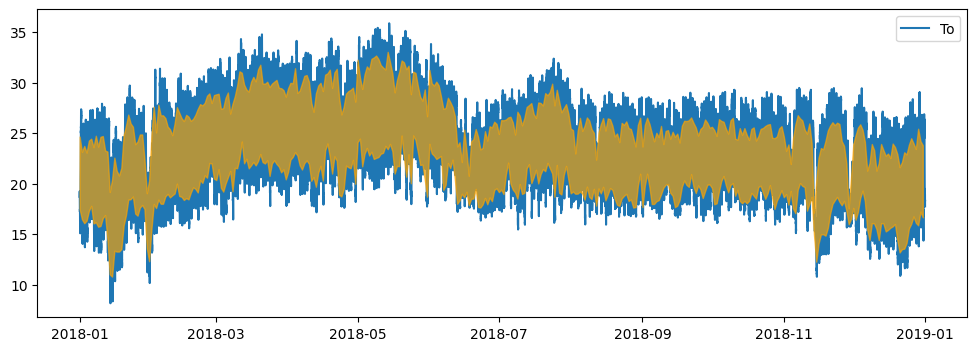

(<Figure size 1200x400 with 1 Axes>, <Axes: >)

In [3]:
def agrega_promedio_std(funcion):
    def wrapper(tmx, columna):
        fig, ax = funcion(tmx, columna)
        daily_mas = tmx[columna].resample("D").mean() + tmx[columna].resample("D").std()
        daily_menos = tmx[columna].resample("D").mean() - tmx[columna].resample("D").std()
        
        ax.fill_between(
            daily_mas.index, 
            daily_mas,
            daily_menos,
            alpha=0.65,
            color="orange",
            zorder=2
        )
        plt.show()
        return fig, ax
    return wrapper
        
        
@agrega_promedio_std
def grafica_columna(tmx,columna):
    fig, ax = plt.subplots(figsize=(12,4),sharex=True)
    
    ax.plot(tmx[columna],label=columna)
    
    ax.legend()
    return fig, ax

grafica_columna(tmx,"To")